# Eserizio

1. Creare un reader per il dataset **ufo_sightings.csv**
    * essendo un [csv](https://en.wikipedia.org/wiki/Comma-separated_values) il separatore è una virgola ","
    * visualizzare il file aprendolo come testo con il notebook di windows
    * C'è un [HEADER](https://en.wikipedia.org/wiki/Header_(computing)), quindi, la prima riga corrisponde al nome delle colonne. Non va in tabella dati.
    * trasformare ogni colonna (dove possibile) in modo tale che sia utilizzabile per la data analsis. Le date a stringa in datetime e i numeri a stringa in [int o float](https://www.digitalocean.com/community/tutorials/how-to-convert-data-types-in-python-3)
    
2. calcolare le 10 shape più ricorrenti usando il modulo [Counter](https://pymotw.com/2/collections/counter.html)

3. la durata media degli avvistamenti

4. durata media per forma

5. qual'è il paese con più avvistamenti

6. plottare il numero di avvistamenti per anno

7. forma più ricorrente per anno

    

In [191]:
### from datetime import datetime as dt
import re 


pth = "C:\\Users\\oldboy\\Documents\\GitHub\\corso_python\\dataset_2\\"
file = "ufo_sightings.csv"

f = open(pth+file)

dati = dict()
for i,l in enumerate(f):
        
    if i == 0:
        header = l.split(",")
        for r,h in enumerate(header):
            if h == 'longitude \n':
                h ='longitude'
                header[r] ='longitude'
            if h == "duration (seconds)":
                h = "duration"
                header[r] = "duration"
            dati[h]=list()
            
    else:
        temp = l.split(",")
        for j,h in enumerate(header):
            if h == "datetime": # BUG DATE
                splitted = temp[j].split(" ")
                date = splitted[0]
                hour,minute = splitted[1].split(":")
                if hour=='24':
                    hour="00"
                temp[j] = date + " " + hour+":"+minute
                temp[j] = dt.strptime(temp[j].strip(),"%m/%d/%Y %H:%M")
            if h == "longitude": # BUG
                temp[j] = float(re.sub("[^0-9^.]", "", temp[j][:-1]))
            if h == "latitude":
                temp[j] = float(re.sub("[^0-9^.]", "", temp[j][:-1]))

            dati[h].append(temp[j])

for i,c in enumerate(dati["country"]):
    if c == "" and dati["city"][i].find("(")>=0:
        if dati["city"][i][dati["city"][i].find("(")+1:-1].lower() == "canada":
                dati["country"][i] = "ca"
        elif dati["city"][i][dati["city"][i].find("(")+1:-1].lower() in ("uk/england",'uk/scotland','republic of ireland','uk/wales'):
            dati["country"][i] = "gb"
        elif dati["city"][i][dati["city"][i].find("(")+1:-1].lower() in ("between","near",'location unspecified','in flight','over'):
            dati["country"][i] = "unknown"
        else:
            dati["country"][i] = dati["city"][i][dati["city"][i].find("(")+1:-1]
    elif c == "" and dati["city"][i].find("(")==-1:
        dati["country"][i] = "unknown"



In [192]:
dati.keys()

dict_keys(['datetime', 'city', 'state', 'country', 'shape', 'duration', 'duration (hours/min)', 'comments', 'date posted', 'latitude', 'longitude'])

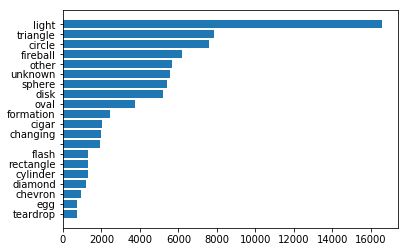

In [199]:
from collections import Counter
import matplotlib.pyplot as plt

conta = Counter(dati["shape"])
conta = conta.most_common(20)
shapes = [c[0] for c in conta]
conta = [c[1] for c in conta]

plt.barh(shapes,conta)
plt.gca().invert_yaxis()
plt.show()

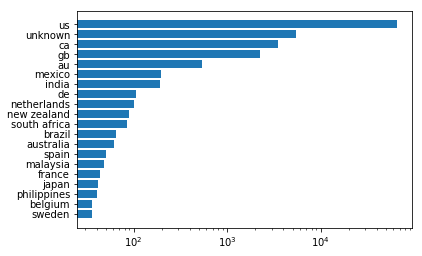

In [198]:
conta = Counter(dati["country"])
conta = conta.most_common(20)
shapes = [c[0] for c in conta]
conta = [c[1] for c in conta]

plt.barh(shapes,conta)
plt.gca().invert_yaxis()
plt.xscale('log')
plt.show()

In [32]:
line = "casa,topo,gatto,0,ciao"
line= line.split(",")
for i,e in enumerate(line):
        print(e)

casa
topo
gatto
0
ciao


In [52]:
animali = ["gatto","cane","elefante","coccodrillo"]
versi = ["miao","bau","wror","non si sa"]
colore = ["nero","bianco","marrone"]

j = 0
for i,a in enumerate(animali):
    print(i,animali[i] + " fa " + versi[i]+" "+ colore[j])
    if a != "gatto":
        j+=1


0 gatto fa miao nero
1 cane fa bau nero
2 elefante fa wror bianco
3 coccodrillo fa non si sa marrone


In [46]:
"+".join(versi)

'miao+bau+wror+non si sa'

In [54]:
a=int
a

int